In [137]:
import numpy as np
import matplotlib.pyplot as plt

help(plt.plot)


Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi

In [128]:
L = 20
N=10
iterations=10
poly = []
for i in range(0, L):
    poly.append([i+L/2, L/2])

    
print(poly)


def randomwalk(x,y):
    adjacents = np.array([np.array([ 0,  1]), np.array([ 1,  0]), np.array([-1,  0]), np.array([ 0, -1])])
    choice = np.random.randint(0,4)
    x += adjacents[choice][0]
    y += adjacents[choice][1]
    return x,y




[[10.0, 10.0], [11.0, 10.0], [12.0, 10.0], [13.0, 10.0], [14.0, 10.0], [15.0, 10.0], [16.0, 10.0], [17.0, 10.0], [18.0, 10.0], [19.0, 10.0], [20.0, 10.0], [21.0, 10.0], [22.0, 10.0], [23.0, 10.0], [24.0, 10.0], [25.0, 10.0], [26.0, 10.0], [27.0, 10.0], [28.0, 10.0], [29.0, 10.0]]


C:\Users\Rene\Anaconda\lib\site-packages\matplotlib\animation.py:1218: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


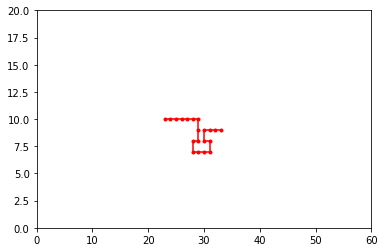

In [135]:
fig = plt.figure()
im = []

for i in range(iterations):
    hx, hy = poly[-1]
    tx, ty = poly[0]
    hx,hy = randomwalk(hx,hy)
    #if (([hx+1, hy] in poly) and ([hx-1, hy]in poly) and ([hx, hy+1]in poly) and ([hx, hy-1] in poly)):
    if [hx, hy] not in poly:
        poly.append([hx, hy])
        poly.remove(poly[0])
        
    #print(poly)

#xlist = poly[0]
#ylist = poly[1]

#plt.plot(xlist,ylist, 'k.')
    var, = plt.plot(np.array(poly)[:, 0], np.array(poly)[:,1], 
                        'k-', marker = '.', color = 'r', animated=True)
    im.append([var])
    
#hx, hy = poly[-1]
#tx, ty = poly[0]
#plt.plot(hx,hy, 'r.', markersize = 10)
#plt.plot(tx,ty, 'b.', markersize = 10)
plt.xlim(0,60)
plt.ylim(0,20)
               
polymer = anim.ArtistAnimation(fig, im, interval = 1, blit = True)
polymer.save("polymer.html")






IndexError: index 10 is out of bounds for axis 0 with size 10

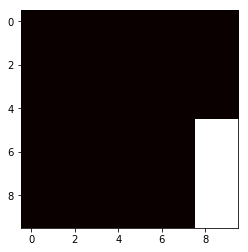

In [138]:
import matplotlib.animation as anim
def randomwalk(x,y):
    adjacents = np.array([np.array([ 0,  1]), np.array([ 1,  0]), np.array([-1,  0]), np.array([ 0, -1])])
    choice = np.random.randint(0,4)
    x += adjacents[choice][0]
    y += adjacents[choice][1]
    return x,y

N=10
iterations=100
lattice = np.zeros((N,N))


fig = plt.figure()
im = []

'for each iteration'
point = 1

x = np.random.randint(N)
y = np.random.randint(N)
#lattice[x][y]=1
X_coord=[x]
Y_coord=[y]
for i in range(iterations):
    x,y = randomwalk(x,y)
    if lattice[x][y]==0:
        X_coord.append(x)
        Y_coord.append(y)
        point += 1
        x,y = randomwalk(x,y)
    else:
        continue

    for x in X_coord:
        for y in Y_coord:
            lattice[x][y]=1
          
    im.append([plt.imshow(lattice, animated=True, cmap = 'hot')])
plt.plot(X_coord,Y_coord, '.')


polymer = anim.ArtistAnimation(fig, im, interval = 100, blit = True)

#polymer.save("polymer.html")


    

TypeError: 'int' object is not subscriptable

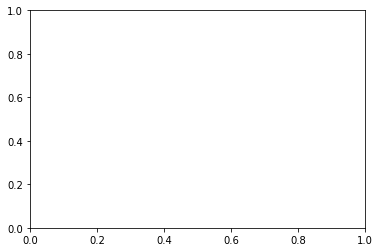

In [12]:
def up(poly):
    poly = [[head[0], head[1] + 1]] + poly
    poly = poly[:-1]
    return poly 

def down(poly):
    poly = [[head[0], head[1] -1 ]] + poly
    poly = poly[:-1]
    return poly

def right(poly): 
    poly = [[head[0] + 1, head[1]]] + poly
    poly = poly[:-1]
    return poly

def left(poly):
    poly = [[head[0] - 1, head[1]]] + poly
    poly = poly[:-1]
    return poly

def random(poly):
    head = poly[0]
    [x,y] = head
    a = np.random.randint(0, 4)
    if a == 0 and not([x+1, y] in poly):
        poly = right(poly)
    elif a == 1 and not([x-1, y] in poly):
        poly = left(poly)
    elif a == 2 and not([x, y+1] in poly):
        poly = up(poly)
    elif a == 3 and not([x, y-1] in poly):
        poly = down(poly)
    else:
        poly = random(poly)
    return poly

def change(poly):
    N = len(poly)
    change = []
    for i in range(0, N):
        change.append(poly[N-1-i])
    return change

def occupied(poly):
    head = poly[0]
    [x,y] = head
    if (([x+1, y] in poly) and ([x-1, y]in poly) and ([x, y+1]in poly) and ([x, y-1] in poly)):
        return True
    else:
        return False

def endtoend(poly):
    head = np.array(poly[0])
    tail = np.array(poly[-1])
    diff = head-tail
    dist = np.sqrt(np.sum(diff**2))
    return dist

def update(poly):
    if occupied(poly):
        polymer = change(poly)
    else:
        polymer = random(poly)
    return polymer

def plot(N, i = 0):
    dist = endtoend(poly)
    distances.append(dist)
    mean = np.average(np.array(distances))
    head = np.array(poly[0])
    tail = np.array(poly[-1])
    plt.xlim(0,N)
    plt.ylim(0,N)
#        plt.axis('off')

    ax.plot(np.array(poly)[:, 0], np.array(poly)[:, 1], '-')
    ax.plot(head[0], head[1], 'ro')
    ax.plot(tail[0], tail[1], 'bo')
    
distances = []
fig = plt.figure()
ax = fig.add_subplot(111)
poly = []
head = 0
tail = 0
diff = 0
dist = 0
mean = 0
T = 10
N = 50

for i in range(0, N):
    poly.append([i+N/2, N/2])
for t in range(T): 
    poly = update(poly)
    ax.clear()
    plot(N, t)
    plt.pause(0.1)
    print(len(distances))


In [ ]:


class PolymerChain(object):
    def up(self):
        self.poly = [[self.head[0], self.head[1] + 1]] + self.poly
        self.poly = self.poly[:-1]
        return self.poly 

    def down(self):
        self.poly = [[self.head[0], self.head[1] -1 ]] + self.poly
        self.poly = self.poly[:-1]
        return self.poly
       
    def right(self): 
        self.poly = [[self.head[0] + 1, self.head[1]]] + self.poly
        self.poly = self.poly[:-1]
        return self.poly
   
    def left(self):
        self.poly = [[self.head[0] - 1, self.head[1]]] + self.poly
        self.poly = self.poly[:-1]
        return self.poly
       
    def random(self):
        self.head = self.poly[0]
        [x,y] = self.head
        a = np.random.randint(0, 4)
        if a == 0 and not([x+1, y] in self.poly):
            self.poly = self.right()
        elif a == 1 and not([x-1, y] in self.poly):
            self.poly = self.left()
        elif a == 2 and not([x, y+1] in self.poly):
            self.poly = self.up()
        elif a == 3 and not([x, y-1] in self.poly):
            self.poly = self.down()
        else:
            self.poly = self.random()
        return self.poly

    def change(self):
        N = len(self.poly)
        change = []
        for i in range(0, N):
            change.append(self.poly[N-1-i])
        return change
    
    def occupied(self):
        self.head = self.poly[0]
        [x,y] = self.head
        if (([x+1, y] in self.poly) and ([x-1, y]in self.poly) and ([x, y+1]in self.poly) and ([x, y-1] in self.poly)):
            return True
        else:
            return False
   
    def endtoend(self):
        self.head = np.array(self.poly[0])
        self.tail = np.array(self.poly[-1])
        self.diff = self.head-self.tail
        self.dist = np.sqrt(np.sum(self.diff**2))
        return self.dist
    
    def update(self):
        if self.occupied():
            polymer = self.change()
        else:
            polymer = self.random()
        return polymer

    def plot(self,N, i = 0):
        self.dist = self.endtoend()
        self.distances.append(self.dist)
        self.mean = np.average(np.array(self.distances))
        self.head = np.array(self.poly[0])
        self.tail = np.array(self.poly[-1])
        plt.xlim(0,N)
        plt.ylim(0,N)
#        plt.axis('off')
        
        self.ax.plot(np.array(self.poly)[:, 0], np.array(self.poly)[:, 1], '-')
        self.ax.plot(self.head[0], self.head[1], 'ro')
        self.ax.plot(self.tail[0], self.tail[1], 'bo')
       
    distances = []
    fig = plt.figure()
    ax = fig.add_subplot(111)
    poly = []
    head = 0
    tail = 0
    diff = 0
    dist = 0
    mean = 0

    def final(self, T = 10, N = 50):
        for i in range(0, N):
            self.poly.append([ i+ N/2, N/2])
        for t in range(T): 
            self.poly = self.update()
            self.ax.clear()
            self.plot(N, t)
            plt.pause(0.1)
            print(len(self.distances))


if __name__ == "__main__":
    sim = PolymerChain()
    sim.final(100, 50)
#    sim.final(500,100)